# Classification

*Classification* is a supervised machine learning method where the model attempts to correctly attribute a *label* to a given input data. It learns by looking at examples with labels, and attempting to understand the relation between the label and the *features*, which are the independent variables.

## Table of Contents

* [Logistic Regression](#logistic-regression)
  * [Softmax Regression](#softmax-regression)
* [Naive-Bayes](#naive-bayes)
  * [Gaussian Naïve-Bayes](#gaussian-naive-bayes)
  * [Categorical Naïve-Bayes](#categorical-naive-bayes)
  * [Bernoulli Naïve-Bayes](#bernoulli-naive-bayes)
  * [Multinomial Naïve-Bayes](#multinomial-naive-bayes)
    * [Complement Naïve-Bayes](#complement-naive-bayes)
* [Decision Tree](#decision-tree)
* [Random Forest](#random-forest)
* [Support Vector Machine (SVM)](#support-vector-machine)
* [K-Nearest Neighbouts (KNN)](#k-nearest-neighbours)
  * [Distance Between Points](#distance-between-two-points)
  * [Minkowski Distance](#minkowski-distance)
  * [Manhattan Distance](#manhattan-distance)
  * [Euclidean Distance](#euclidean-distance)
    * [NaN-Euclidean Distance](#nan-euclidean-distance)
  * [Haversine Distance](#haversine-distance)

## Logistic Regression <a id="logistic-regression"></a>

Despite being named *Logistic Regression*, this algorithm is used in the classification task, and is the first model that will be tackled in this chapter. To explain what the Logistic Regression is, it makes sense to define the *Logistic Function*. This function takes as input any real number, for example *t*, and outputs a value between 0 and 1. The inputs of this function are regularly called *logits* and the output corresponds to the probability. The standard logistic regression is then defined as:

$$ \sigma (t) = \frac{e^{t}}{e^{t} + 1} = \frac{1}{1 + e^{-t}}$$

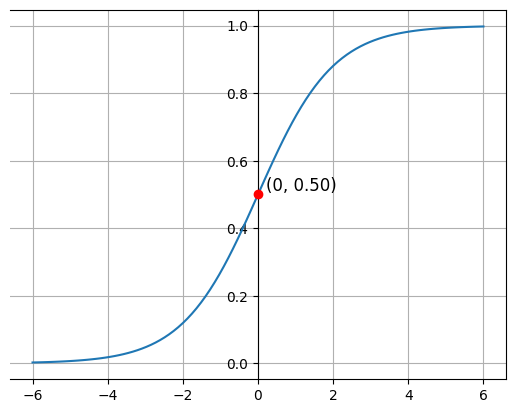

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-6, 6, 100)
sigma = 1 / (1 + np.exp(-t))

y_intercept = 1 / (1 + np.exp(0))

plt.plot(t, sigma)
plt.scatter(0, y_intercept, color="red", zorder=3)
plt.text(0.2, y_intercept, f"(0, {y_intercept:.2f})", fontsize=12, color="black", verticalalignment="bottom")
plt.grid(True)
ax = plt.gca()
ax.spines["left"].set_position("center")
plt.show()


As shown in the code above, this function intercepts the $y$ axis at 0.50. $t$ can be defined by a function, for example, $t = \theta_{0} + \theta_{1}x$, allowing us to rewrite the logistic equation as:

$$ p(x) = \sigma (t) = \frac{1}{1 + e^{-(\theta_{0} + \theta_{1}x)}} $$

In this context, $p(x)$ corresponds to the probability that an independent variable $y$ belongs to the label one (see label one as the opposite of the label zero, like true and false, respectively) and this equation will be further explained below. However, $t$ does not need to be characterized by two parameters and can be described by a $n$ number of features, so that:

$$
X =
\begin{bmatrix}
    x_{11} & \dots  &  x_{1m} \\
    x_{21} & \dots  &  x_{2m} \\
    \vdots & \ddots & \vdots  \\
    x_{n1} & \dots  &  x_{nm} \\
\end{bmatrix}
$$

Therefore, $Y$ can also be described as:

$$ 
Y =
\left\{
    \begin {aligned}
         & 0 \quad \text{if Class 0}  \\
         & 1 \quad \text{if Class 1}  \\
    \end{aligned}
\right.
$$

The function $t$ can now be rewritten as:

$$
t = \sum_{i=1}^{n} w_{i}x_{i} + b
$$

when $w = [w_{1}, w_{2}, ..., w_{n}]$ is the array that contains the weights of the coefficients and $b$ is the bias of the equation. One can go further and rewrite X as the following, where $w_{0} = b$:
$$
    X =
    \begin{bmatrix}
           1   &    1   &    1    \\
        x_{11} & \dots  &  x_{1m} \\
        x_{21} & \dots  &  x_{2m} \\
        \vdots & \ddots & \vdots  \\
        x_{n1} & \dots  &  x_{nm} \\
    \end{bmatrix} \text{and }
    w = [w_{0}, w_{1}, w_{2}, ..., w_{n}]
$$
Simplifying $t$ to:
$$
    t = w \cdot X
$$

Lastly, consider $P(y=1) = \sigma(t)$ and $P(y=0) = 1 - \sigma(t)$.

Logits is the inverse of the logistic equation expression so that:

$$ \text{logit} (p) = \sigma^{-1}(p) $$

To find what $\sigma^{-1}(p)$, we must solve the following for $x$:

$$ 
\begin{aligned}
&\sigma(x) = p \\
&\Leftrightarrow p = \frac{1}{1+e^{-x}} \\
&\Leftrightarrow p + pe^{-x} = 1 \\
&\Leftrightarrow pe^{-x} = 1 - p \\
&\Leftrightarrow e^{-x} = \frac{1 - p}{p} \\
&\Leftrightarrow e^{x} = \frac{p}{1 - p} \\
&\Leftrightarrow x = ln\left(\frac{p}{1 - p}\right) \\
\end{aligned}
$$

Then:
$$ \text{logit}p = \sigma^{-1}(p) = ln\left(\frac{p}{1 - p}\right) = t(x) $$

From which we can elaborate:

$$
\begin{aligned}
&\ln\left(\frac{p}{1 - p}\right) = wX \\
&\Leftrightarrow \frac{p}{1 - p} = e^{wX} \\
&\Leftrightarrow p = e^{wX}(1 - p) \\
&\Leftrightarrow p + pe^{wX} = e^{wX} \\
&\Leftrightarrow p (1 + e^{wX}) = e^{wX} \\
&\Leftrightarrow p = \frac{e^{wX}}{1 + e^{wX}} \\
&\Leftrightarrow p = \frac{1}{1 + e^{-wX}} \\
&\Leftrightarrow p(w, X) = \frac{1}{1 + e^{-wX}} \\
\end{aligned}
$$

The usual measure of a good fit in logistic regression is the logistic loss, also known as the negative log-likelihood. As written above, for a given value $x_{i}$ and $y_{i}$, $p_{i} = p(x_{i})$ corresponds to the probability that the values $x_{i}$ correspond to $y_{i} = 1$. On the contrary, the probability that the same values of $x_{i}$ correspond to $y_{i} = 0$ is $1 - p(x_{i})$. The log loss can be described, for a point $i$, as:

$$
\ell_{i} = 
\left\{
    \begin{aligned}
         & -\text{ln}(p_{i})     \quad & \text{if $y_{1} = 1$}  \\
         & -\text{ln}(1 - p_{i}) \quad & \text{if $y_{1} = 0$}  \\
    \end{aligned}
\right.
$$

One common way to interpret the log loss is as the surprise of the outcome $y_{i}$ for the predicted probability $p_{i}$. Log loss varies from 0 to infinity: it is zero when a perfect prediction is made ($p_{i} - y_{m} = 0$) and tends to infinity in the opposite case ($p_{i} - y_{m} = \pm 1$). The log loss can be combined in one single expression as presented below:

$$
\ell_{i} = -y_{i}\text{ln}(p_{i}) - (1 - y_{i})\text{ln}(1 - p_{i})
$$

The sum of the log loss for for every $i$ value is the overall negative log-likelihood $-\ell$ and the best fit for $w$ is when $-\ell$ is minimized. Alternatively, instead of minimizing the loss, one can maximize its inverse, the log-likelihood:

$$
\ell_{i} = \sum_{i:y_{i}=1} \text{ln}(p_{i}) + \sum_{i:y_{i}=0} \text{ln}(1 - p_{i}) = \sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})
$$

Similarly, it is possible to maximize the likelihood function itself, which corresponds to the probability of the outcome given a set of data, $L$:
$$
\begin{aligned}
&L = e^{\sum_{i=1} y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i})} =\\
&= \Pi_{i=1}^{n} e^{y_{i}\text{ln}(p_{i})} \cdot e^{(1 - y_{i})\text{ln}(p_{i})} =\\
&= \Pi_{i=1}^{n} p_{i}^{y_{i}} \cdot (1 - p_{i})^{1 - y_{i}} \\
\end{aligned}
$$
$$
\therefore \\
\begin{aligned}
&L = \Pi_{i:y_{i}=1}(p_{i}) \Pi_{i:y_{i}=0}(1 - p_{i})\\
\end{aligned}
$$

This method is also known as maximum likelihood estimation. 

Unlike Linear Regression, Logistic Regression does not have a closed-form equation that allows us to obtain the best set of $\theta$ values. Fortunately, log-loss is a convex function, which means that with a low enough learning rate and patience, it is guaranteed to reach the global minimum, using Gradient Descent or any other optimization algorithm. Now, let's derive the log-loss to get a grasp of what is necessary to attain the optimal set of $\theta$, including the division by the total number of data points:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1} \left[ y_{i}\text{ln}(p_{i}) + (1 - y_{i})\text{ln}(1 - p_{i}) \right]\\
\Leftrightarrow J(\theta) = \sum_{i=1} \left[ y_{i}\text{ln}(\sigma (\theta^{T} \text{x}^{(i)})) + (1 - y_{i})\text{ln}(1 - \sigma (\theta^{T} \text{x}^{(i)})) \right]\\
$$

Deriving, we get:

$$
\frac{\partial}{\partial \theta_{j}} J(\theta) =  - \frac{1}{m} \sum^{m}_{i=1} \left( \frac{\partial}{\partial \theta_{j}} y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) \left( \frac{\partial}{\partial \theta_{j}} (1 - y^{(i)})(\text{ln}(1 - \sigma(\theta^{T}\text{x}))) \right)\\
$$

Let's begin by calculating the derivative of the left part:

$$
\begin{aligned}
&\frac{\partial}{\partial \theta_{j}} \left( y^{(i)}(\text{ln}(\sigma(\theta^{T}\text{x}))) \right) =\\
&= \frac{\partial}{\partial \theta_{j}} \left( y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right) \right) =\\
&= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(\frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}}} \right) \right) =\\
&= \frac{\partial}{\partial \theta_{j}} \left( -y^{(i)}\text{ln}\left(1 + e^{-\theta^{T}\text{x}} \right) \right) =\\
&= - \frac{1}{e^{-\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{-\theta^{T}\text{x}} + 1)=\\
&= x_{j}^{(i)} \frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}=\\
&= x_{j}^{(i)} \sigma (-\theta^{T} \text{x})=\\
&= x_{j}^{(i)} \frac{1}{1 + e^{\theta^{T}\text{x}}}=\\
&= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} - e^{\theta^{T}\text{x}} + 1}{1 + e^{\theta^{T}\text{x}}}=\\
&= x_{j}^{(i)} \frac{e^{\theta^{T}\text{x}} + 1}{e^{\theta^{T}\text{x}} + 1} - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
&= x_{j}^{(i)} \left(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1} \right)=\\
&= x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right)
\end{aligned}
$$

Now the derivative of the right part:
$$
\begin{aligned}
&\frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \sigma(\theta^{T}\text{x})) =\\
&= \frac{\partial}{\partial \theta_{j}} \text{ln}(1 - \frac{e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}) =\\
&= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(1 - \frac{1}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
&= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1 - 1 + e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
&= \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{e^{-\theta^{T}\text{x}}}{e^{-\theta^{T}\text{x}} + 1}\right) =\\
&= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(\frac{1}{e^{-\theta^{T}\text{x}}} + 1\right) =\\
&= - \frac{\partial}{\partial \theta_{j}} \text{ln}\left(e^{\theta^{T}\text{x}} + 1\right) =\\
&= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times \frac{\partial}{\partial \theta_{j}} (e^{\theta^{T}\text{x}} + 1) \right]=\\
&= - \left[\frac{1}{e^{\theta^{T}\text{x}} + 1} \times x_{j}^{(i)} e^{\theta^{T}\text{x}} \right]=\\
&= - \frac{x_{j}^{(i)} e^{\theta^{T}\text{x}}}{e^{\theta^{T}\text{x}} + 1}=\\
&= - x_{j}^{(i)}\sigma{(\theta^{T}\text{x})}
\end{aligned}
$$

Now plugging in both parts in the equation, we get:

$$
\begin{aligned}
\frac{\partial}{\partial \theta_{j}} J(\theta) &=  - \frac{1}{m} \sum^{m}_{i=1} \left[ \left( x_{j}^{(i)} \left(1 - \sigma (\theta^{T}\text{x}) \right) \right) \left(- x_{j}^{(i)}\sigma{(\theta^{T}\text{x})} \right) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) &=  - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) + y^{(i)} x^{(i)}_{j} \sigma (\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) &= - \frac{1}{m} \sum^{m}_{i=1} \left[ y^{(i)} x^{(i)}_{j} - x_{j}^{(i)} \sigma(\theta^{T}\text{x}) \right]\\
\Leftrightarrow \frac{\partial}{\partial \theta_{j}} J(\theta) &= \frac{1}{m} \sum^{m}_{i=1} \left[ x^{(i)}_{j} (\sigma(\theta^{T}\text{x}) - y^{(i)}) \right]\\
\end{aligned}
$$

Therefore, the partial derivative of the log-loss function with respect to $\theta$ for a feature $\theta_{j}$ is given by the expression above.

To test the use of Logistic Regression in the classification, we shall use the famous Iris Dataset, that contains only four features (the sepal and pethal length and width) of iris flowers from three different species (Iris-Setosa, Iris-Versicolor, and Iris-Virginica). In this case, we will only consider the petal width as feature and two possible classes: is a Iris-Virginica plant or is not a Iris-Virginica plant.


In [ ]:
from sklearn import datasets
iris = datasets.load_iris() 
list(iris.keys())


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris["feature_names"]


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

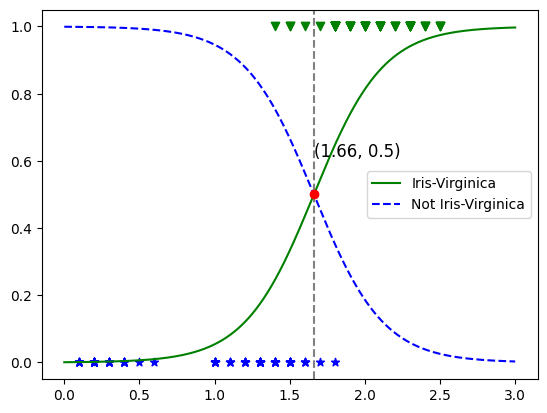

In [4]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 3:] # Gets the petal width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

interception = X_new[y_proba[:, 1] > y_proba[:, 0]][0][0]

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.axvline(interception, ls="--", c="gray")
plt.scatter(interception, 0.5, color="red", zorder=3)
plt.text(interception, 0.6, f"({interception:.2f}, 0.5)", fontsize=12, color="black", verticalalignment="bottom")
plt.scatter(X_zero, y_zero, marker="*", color="blue")
plt.scatter(X_one, y_one, marker="v", color="green")
plt.legend()
plt.show()


In this plot, we tried to represent the curves of probabilities of a petal length belonging to a class. In this case, the threshold length after which the plant is considered Iris-Virginica is 1.66 cm. It is seen in the plot, that some instances of Iris-Virginica have a petal length smaller than that while plants of other species have a petal length above it. In this regeion, the model is unsure of which class the data belongs to, with a confidence around near 50%.

Theta_0 (intercept): -45.27
Theta_1: 5.75
Theta_2: 10.45


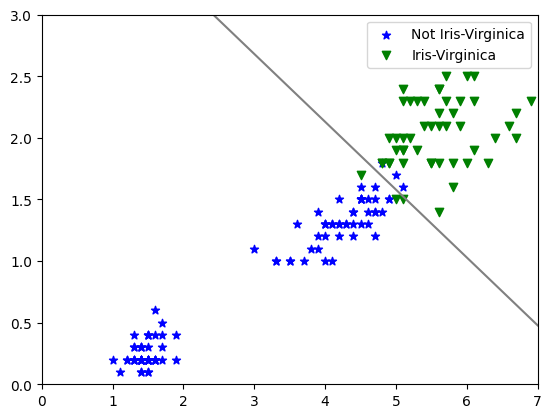

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

X = iris["data"][:, 2:]

X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

log_reg = LogisticRegression(penalty=None)
log_reg.fit(X, y)

theta_0 = log_reg.intercept_[0]
theta_1, theta_2 = log_reg.coef_[0]

# 0 = theta_0 + theta_1 * X_1 + theta_2 * X_2
# - theta_0 + theta_1 * X_1 / theta_2 = X_2

X1_display = np.linspace(0, 7, 1000).reshape(-1, 1)
X2_display = - (theta_0 + theta_1 * X1_display) / theta_2

X_zero = X[y==0]
y_zero = y[y==0]
X_one = X[y==1]
y_one = y[y==1]

print(f"Theta_0 (intercept): {theta_0:.2f}")
print(f"Theta_1: {theta_1:.2f}")
print(f"Theta_2: {theta_2:.2f}")

plt.axis([0,7, 0,3])
plt.plot(X1_display, X2_display, c="gray")
plt.scatter(X_zero[:,0], X_zero[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_one[:,0], X_one[:,1], marker="v", c="green", label="Iris-Virginica")
plt.legend()
plt.show()


We have seen above the boundary predicted by the model when two features are considered. Let's compare it with a solution done without using Scikit-learn:

In [6]:
import numpy as np

epochs = 100000
learning_rate = 0.01
X = iris["data"][:, 2:]
m = X.shape[1]

X_0 = np.ones(X.shape[0]).reshape(-1, 1)
X_1 = iris["data"][:, 2].reshape(-1, 1) # Gets the petal length and width data
X_2 = iris["data"][:, 3].reshape(-1, 1) # Gets the petal length and width data
X = np.concatenate((X_0, X_1, X_2), axis=-1)
y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

theta = np.zeros(X.shape[1])

for epoch in range(epochs):
    y_pred = 1 / (1 + np.exp(- X @ theta))

    d_theta = (1 / m) * (X.T @ (y_pred - y))

    theta = theta - learning_rate * d_theta

print(f"Theta_0 (intercept): {theta[0]:.2f}")
print(f"Theta_1: {theta[1]:.2f}")
print(f"Theta_2: {theta[2]:.2f}")


Theta_0 (intercept): -44.26
Theta_1: 5.60
Theta_2: 10.28


As we see, with enough epochs and a small enough learning rate, the result converged to the same solution as when using the Sklearn function!

### Softmax Regression <a id="softmax-regression"></a>

As you might have noticed, the Logistic Regression can be used in binary classification. When we apply the same principles for a multi-class problem, we call it *Softmax Regression* or *Multinomial Logistic Regression*.

When given an instance **x**, the Softmax Regression model computes a score $s_{k}$(x) for each class $k$. Then applies the softmax function, which estimates the probability of each class (this function is also called *normalized exponential*) to the *s* scores. The scores are calculated using the Linear Regression equation, explained [here](regression.ipynb#linear-regression):

$$ s_{k}(\text{x}) = \theta_{k}^{T} \cdot \text{x}$$

For a determined instance x, we calculate the score of each class and estimate each probability by running the scores in the softmax function, with $K$ being the number of classes, s(x) is the vector that contains the scores for all the K classes, and $\sigma (\text{s}_{k}(x))_{k}$ is the probability that the instance **x** belongs to the class $k$:

$$
\hat{p}_{k} = \sigma (s(x))_{k} = \frac{e^{s_{k}(\text{x})}}{\sum_{j=1}^{K}e^{s_{j}(\text{x})}}
$$

As done in the Logistic Regression, the classifier predicts the class that has the highes probability (the class with highest score).

$$ \hat{y} = \text{argmax}_{k} \sigma (\text{s(x)})_{k} = \text{argmax}_{k} \text{s}_{k}\text{(x)} = \text{argmax}_{k} (\theta^{T} \cdot \text {x})$$

As you may guess, the softmax function only predicts one class at a time, which means that it can only be used in mutually exclusive examples.

Despite the Softmax Regression being a model similar to the Logistic Regression, the loss function is different. In this problem, our model must output a high probability for the correct class and a low probability for the remaining classes. Thus, the loss function attributed to this model penalizes the model when a low probability is attributed to the correct class and is called cross-entropy. This cost function has multiple other use cases since it is used to evaluate how well the estimated probabilities match the target class. Its equation is shown below and $\Theta$ represents the matrix that contains all the $\theta_{k}$ vector:

$$ J(\Theta) = - \frac{1}{m} \sum_{m=1}^{m} \sum_{k=1}^{K} y_{k}^{(i)} \text{log}(\hat{p}_{k}^{(i)})$$

Notice that if we have $K=2$, we get the log-loss function seen above. To apply Gradient Descent or any other optimization algorithm, we must first find the derivative of the cross-entropy function. Let's start by first deriving the softmax function:

$$
\hat{p}_{k}^{(i)} = \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{k}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} = \frac{\partial}{\partial s_{k}^{(i)}(\text{x})} \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
$$

In this situation, we have two derivatives to perform: one when $k = m$ and one when $k \neq m$, where $m$ represents the correct class and $k$ represents the class for which we are calculating the derivative. Starting with $k = m$:

$$
\begin{aligned}
\frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{\partial}{\partial s_{m}^{(i)}(\text{x})} \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{(e^{s_{m}^{(i)}(\text{x})})' \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} \left( \sum^{C}_{j=1}{e^{s_{j}^{(i)}(\text{x})}} \right)'}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{e^{s_{m}^{(i)}(\text{x})} \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} \left[ e^{s_{m}^{(i)} \text{x}} \sum^{C}_{j \neq m: j=1}{e^{s_{j}^{(i)}(\text{x})}} \right]'}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{e^{s_{m}^{(i)}(\text{x})} \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})} e^{s_{m}^{(i)} (\text{x})}}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{e^{s_{m}^{(i)}(\text{x})} \left( \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)} (\text{x})}\right)}{\left(\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} \times \frac{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)} (\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} \times \left( \frac{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}} - \frac{e^{s_{m}^{(i)} (\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})}}\right)\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{m}^{(i)}(\text{x})} &= \hat{p}_{m}^{(i)} (1 - \hat{p}_{m}^{(i)})
\end{aligned}
$$

Now for $k \neq m$:

$$
\begin{aligned}
\frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= \frac{\partial}{\partial s_{m}^{(i)}(\text{x})} \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C}e^{s_{j}^{(i)}(\text{x})}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= \frac{(e^{s_{m}^{(i)} (\text{x})})' \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})}\left(\sum_{j=1}^{C} e^{s_{j}^{(i)} (\text{x})}\right)'}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= \frac{0 \times \sum_{j=1}^{C} e^{s_{j}^{(i)}(\text{x})} - e^{s_{m}^{(i)}(\text{x})}\left(e^{s_{k}^{(i)} (\text{x})} + \sum_{j \neq k: j=1}^{C} e^{s_{j}^{(i)}} \right)'}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= - \frac{e^{s_{m}^{(i)}(\text{x})} \times e^{s_{k}^{(i)}(\text{x})}}{\left( \sum_{j=1}^{C} e^{s_{j}^{(i)}} \right)^{2}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= - \frac{e^{s_{m}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}}} \times \frac{e^{s_{k}^{(i)}(\text{x})}}{\sum_{j=1}^{C} e^{s_{j}^{(i)}}}\\
\Leftrightarrow \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}(\text{x})} &= - \hat{p}_{k}^{(i)}\hat{p}_{m}^{(i)}
\end{aligned}
$$

Now, let's procede with the derivative of the log of the probability with respect to $s_{k}$ for the two previous situations. Starting with $k = m$:

$$
\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \hat{p}_{m}^{(i)} (1 - \hat{p}_{m}^{(i)}) = 1 - \hat{p}_{m}^{(i)}
$$

For $k \neq m$:

$$
\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \frac{\partial \hat{p}_{m}^{(i)}}{\partial s_{k}^{(i)}} = \frac{1}{\hat{p}_{m}^{(i)}} \times \left( - \hat{p}_{k}^{(i)}\hat{p}_{m}^{(i)} \right) = -\hat{p}_{k}^{(i)} 
$$

Now, we can finally infer that, for an array of values $\theta$:

$$
\begin{aligned}
&\frac{\partial J}{\partial \theta_{k}} = -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial \theta_{k}} \right) =\\
&= -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} \times \frac{\partial s_{k}^{(i)}}{\partial \theta_{k}} \right) = \\
&= -\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} \left(\frac{\partial \text{log} (\hat{p}_{m}^{(i)})}{\partial s_{k}^{(i)}} \times \frac{\partial \theta_{k}^{T}\text{x}^{(i)}}{\partial \theta_{k}} \right) = \\
&=-\frac{1}{m} \sum_{i=1}^{m} \sum_{m=1}^{C} y_{m}^{(i)} 
\left\{
    \begin{aligned}
         & (1 - \hat{p}_{m}^{(i)})     \quad & \text{if $k = m$}    \\
         & - \hat{p}_{k}^{(i)}         \quad & \text{if $k \neq m$} \\
    \end{aligned}
\right. \text{x}^{(i)} =\\
&= \frac{1}{m} \sum_{i=1}^{m} - \left[ y_{k}^{(i)}(1 - \hat{p}_{k}^{(i)}) + \sum_{m \neq k: m=1}^{C} y_{m}^{(i)}(-\hat{p}_{k}^{(i)}) \right] \text{x}^{(i)} =\\
&= \frac{1}{m} \sum_{i=1}^{m} - y_{k}^{(i)}(1 - \hat{p}_{k}^{(i)}) \text{x}^{(i)} = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_{k}^{(i)} - y_{k}^{(i)}) \text{x}^{(i)}
\end{aligned}
$$

From this, we can write the following expression, which corresponds to the vector gradient of the cross entropy for class $k$:

$$ \nabla_{\theta_{k}} J(\Theta) = \boxed{\frac{1}{m} \sum_{i=1}^{m} (\hat{p}_{k}^{(i)} - y_{k}^{(i)}) \text{x}^{(i)}} $$

From this equation, we can now calculate the gradient vector for every class and then apply an optimization algorithm to find the parameter matrix $\Theta$ that minimizes the cost function. In the following code, we will present an implementation of the Softmax Regression. In Scikit-learn, the ``LogisticRegression()`` function can be applied to multi-class classification by applying a one-versus-all approach (for every class, calculates the probability of belonging to it or not, a binary task). However, by changing the ``multi_class`` argument to "multinomial", the function switches to a Softmax Regression.


In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 2:]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)
softmax_reg.fit(X, y)

for class_num in range(X.shape[1] + 1):
    theta_0 = softmax_reg.intercept_[class_num]
    theta_1, theta_2 = softmax_reg.coef_[class_num]

    print(f"Class {class_num}")
    print(f"Theta_0 (intercept): {theta_0:.2f}")
    print(f"Theta_1: {theta_1:.2f}")
    print(f"Theta_2: {theta_2:.2f}")


Class 0
Theta_0 (intercept): 41.12
Theta_1: -8.35
Theta_2: -17.97
Class 1
Theta_0 (intercept): 2.08
Theta_1: 1.30
Theta_2: 3.76
Class 2
Theta_0 (intercept): -43.20
Theta_1: 7.05
Theta_2: 14.21


Let's now try and implement, manually, the function using only NumPy and see if the values obtained are similar:

In [ ]:
import numpy as np

epochs = 2000000
lr = 0.3

X = iris["data"][:, 2:]
y = iris["target"]
m = X.shape[0]

X = np.c_[np.ones(X.shape[0]), X]

# One-hot encode the data
Y = np.zeros((m, len(np.unique(y))))
Y[np.arange(m), y] = 1

theta = np.zeros((X.shape[1], len(np.unique(y))))

for epoch in range(epochs):
    score = X @ theta
    prob = np.exp(score) / np.sum(np.exp(score), axis=1, keepdims=True)
    grad_theta = (1/m) * X.T @ (prob - Y) 
    theta = theta - grad_theta * lr

for class_num in range(X.shape[1]):
    theta_0 = theta[0][class_num]
    theta_1, theta_2 = theta[1][class_num], theta[2][class_num]

    print(f"Class {class_num}")
    print(f"Theta_0 (intercept): {theta_0:.2f}")
    print(f"Theta_1: {theta_1:.2f}")
    print(f"Theta_2: {theta_2:.2f}")


Class 0
Theta_0 (intercept): 32.56
Theta_1: -6.68
Theta_2: -11.16
Class 1
Theta_0 (intercept): 6.33
Theta_1: 0.47
Theta_2: 0.36
Class 2
Theta_0 (intercept): -38.89
Theta_1: 6.21
Theta_2: 10.80


Our implementation with Gradient Descent is obviously not as optimized as the one in Scikit-learn, such as, for example, the solver utilized. However, with our much slower method, a large number of epochs and an agressive learning rate come close to the parameters attained in Scikit-learn.  

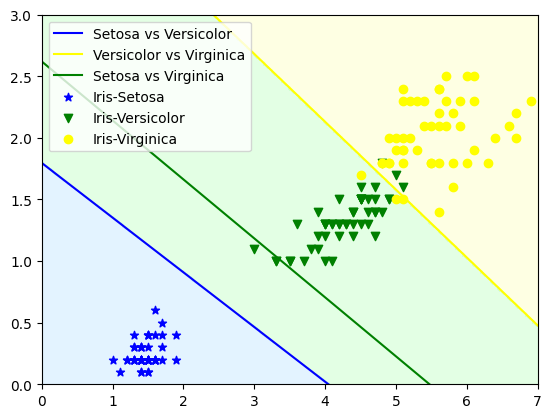

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X = iris["data"][:, 2:]

X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data
y = iris["target"].astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", penalty=None)
softmax_reg.fit(X, y)

theta_setosa_0 = softmax_reg.intercept_[0]
theta_setosa_1, theta_setosa_2 = softmax_reg.coef_[0]
theta_versicolor_0 = softmax_reg.intercept_[1]
theta_versicolor_1, theta_versicolor_2 = softmax_reg.coef_[1]
theta_virginica_0 = softmax_reg.intercept_[2]
theta_virginica_1, theta_virginica_2 = softmax_reg.coef_[2]

X1_display = np.linspace(0, 7, 1000).reshape(-1, 1)

# Each class boundary is defined as the points where the probability of a class belong to the two classes 
# considered is equal. It can be solved as follows:
# P_setosa = P_versicolor
# \theta_setosa @ X = \theta_versicolor @ X
# \theta_setosa_0 + \theta_setosa_1 @ X_1 + \theta_setosa_2 @ X_2 = \theta_versicolor_0 + 
# + \theta_versicolor_1 @ X_1 + \theta_versicolor_2 @ X_2
# X_2 = ((\theta_setosa_0 - \theta_versicolor_0) + 
# + (\theta_setosa_1 - \theta_versicolor_1) @ X_1) / (\theta_setosa_2 - \theta_versicolor_2)

X2_display_setosa_versicolor = -((theta_setosa_0 - theta_versicolor_0) \
                                 + (theta_setosa_1 - theta_versicolor_1) * X1_display) \
                                 / (theta_setosa_2 - theta_versicolor_2)
X2_display_versicolor_virginica = -((theta_versicolor_0 - theta_virginica_0) \
                                    + (theta_versicolor_1 - theta_virginica_1) * X1_display) \
                                    / (theta_versicolor_2 - theta_virginica_2)
X2_display_setosa_virginica = -((theta_setosa_0 - theta_virginica_0) \
                                + (theta_setosa_1 - theta_virginica_1) * X1_display) \
                                / (theta_setosa_2 - theta_virginica_2)

X_setosa = X[y==0]
y_setosa = y[y==0]
X_versicolor = X[y==1]
y_versicolor = y[y==1]
X_virginica = X[y==2]
y_virginica = y[y==2]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
plt.plot(X1_display, X2_display_setosa_versicolor, c="blue", label="Setosa vs Versicolor")
plt.plot(X1_display, X2_display_versicolor_virginica, c="yellow", label="Versicolor vs Virginica")
plt.plot(X1_display, X2_display_setosa_virginica, c="green", label="Setosa vs Virginica")
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.show()


Above we show the decision boundaries plotted and the regions that belong to each class, depending on the two features considered.

## Naïve-Bayes <a id="naive-bayes"></a>

### Gaussian Naïve-Bayes <a id="gaussian-naive-bayes"></a>

The Naïve-Bayes classifier is one of the most elemental classifiers, based on the Bayes' Theorem to find probabilities, which is where we will start from. The Bayes Theorem is a mathematical formula to determine the conditional probability of an event on prior knowledge or new evidence. The general statement of the Bayes' Theorem is “The conditional probability of an event A, given the occurrence of another event B, is equal to the product of the event of B, given A and the probability of A divided by the probability of event B.”, which translates to the following equation:

$$ P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In this equation, $P(A)$ and $P(B)$ correspond, respectively, to the probabilities of the events A and B, and the probability of B is never 0. $P(A|B)$ corresponds to the probability of event A happening when event B happens. Contrasting, $P(B|A)$ is the probability of event B when A happens. $P(A|B)$ is also called the *posterior probability* since the probability is calculated with posterior knowledge of event B. $P(B|A)$ is the *likelihood probability*. $P(A)$ is named the *prior* and corresponds to the probability of an event without the posterior knowledge. $P(B)$ is also called *evidence*.

Parting from this small introduction on Bayes Theorem, it is time to explain where the name Naïve-Bayes comes from. Bayes comes from the Bayes Theorem. Naïve comes from the assumptions made when using this classifier, with the first being an unreal (hence the name Naïve) assumption that the presence of one feature is independent from the others. Apart from the *Feature Independence*, we also assume a normal distribution among continuous features within each class. In the case of discrete features, a multinomial distribution is assumed within each class. Lastly, we assume no missing data and that all the features carry the same importance. In real world cases, these assumptions do not occur but the Naïve-Bayes still works fine.

Since we assume independence between variables, we can assume the following:

$$ P(A \cap B) = P(A,B) = P(A) \times P(B)$$

Substituting $A$ with $y$ and $B$ with $x$, this translates to the following:

$$
\begin{aligned}
P(y|x) &= \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) &= \frac{P(x|y) \times P(y)}{P(x_{1}, x_{2}, ..., x_{n})}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) &= \frac{P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)}{P(x_{1}) \times P(x_{2}) \times ... \times P(x_{n})}\\ 
\end{aligned}
$$

Note that independent of the input, the denominator stays the same. From this, we can conclude that, across different values of $y$, the value of the posterior is conditioned only by the probabilities on the numerator. Therefore: 

$$
P(y|x_{1},..., x_{n}) \propto P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)\\
$$

Now, let's consider the same two features considered in the [Logistic Regression](#logistic-regression) code and see how Naïve-Bayes can be used to estimate whether, for the considered features, a plant is Iris-Virginica or not.

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris() 

X = iris["data"][:, 2:]
X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data

y = (iris["target"] == 2).astype(int) # Sets the target as 1 for Iris-Virginica and 0 for any other plants

means, stds = np.zeros((X.shape[1], len(np.unique(y)), 2))

for feature_num in range(X.shape[1]):
    for class_index in np.unique(y):
        tmp_x = X[:,feature_num][y==class_index]
        means[feature_num][class_index] = np.mean(tmp_x)
        stds[feature_num][class_index] = np.std(tmp_x)

print("Means:")
print(means)
print("Standard Deviations:")
print(stds)


Means:
[[2.861 5.552]
 [0.786 2.026]]
Standard Deviations:
[[1.44228257 0.54634787]
 [0.56232019 0.27188968]]


Now that we calculated the mean and standard deviation for each class and feature, we can calculate the probability of every point belonging to Iris-Virginica or not. Let's start with a specific point, which you may change to check what output it gives you. Let's start by declaring a point that we can predict to which class it belongs:

In [ ]:
point = [4.0, 1.1] # Example for class 0
# point = [6.0, 2.5] # Example for class 1


As we have seen above, to estimate the class to which a point belongs, we need to calculate the priors of the classes, $P(y)$, and the likelihood for each class and feature, $P(x_{i}|y)$. Starting with the priors, these values are simply calculated by the dividing the number of occurences of a class by the total number of data points:

In [ ]:
prob_y = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    prob_y[y_value] = (len(X[y==y_value]) / len(X))
    print(f"Probability of Class {y_value}: {prob_y[y_value]:.2f}")


Probability of Class 0: 0.67
Probability of Class 1: 0.33


Now, to calculate the likelihood is not as straight forward as the priors. Since we are performing Naïve-Bayes classification, the continuous features, which are the ones that we are handling, are assumed to follow a normal distribution for each class. In other words, the probability of $P(x_{i}|y)$ follows a normal distribution, and considering the mean of the class as $\mu$ and the standard deviation as $\sigma$, it can be written as:

$$x_{i}|y \sim \mathcal{N}(\mu_{y}, \, \sigma^{2}_{y})$$

From this, we can estimate the likelihood for a determined feature $x_{i}$ when belonging to a class $y$. This value will be calculated as follows:

$$p(x_{i}|y) = \frac{1}{\sqrt{2\pi\sigma^{2}_{y}}} e^{\left(\frac{-(x_{i} - \mu_{y})^{2}}{2\sigma^{2}_{y}}\right)}$$

To prevent numerical instability and division by zero, often times the variance is smoothed, by adding a regularizer term. This term is expressed in the following equation, where $\epsilon$ is a small value (its default value in ``scikit-learn`` is $10^{-9}$):

$$
\sigma^{2}_{y \text{(smoothed)}} = \sigma^{2}_{y} + \text{max}(\text{var}(X))
$$

In this context, to every variance calculated from the distribution of each feature, the maximum value of variance found in any of the features is added after being multiplied by a small number. Now, we can compute this using the previously calculated mean and standard deviation for each class and feature, but without smoothing for simplicity's sake:

In [ ]:
likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
print(likelihood_matrix)


[[2.02504194e-01 2.78445773e-15]
 [5.71650107e-08 4.44358906e-03]]


This matrix contains the likelihood for each feature when related to each class. However, as we have seen above, it is of our interest to obtain the result of the multiplication of all likelihoods in a class $y$.

In [ ]:
likelihoods = np.prod(likelihood_matrix, axis=0)
print(likelihoods)


[1.15761544e-08 1.23729859e-17]


Now that we have the products of our likelihoods, we just need to multiply by the priors before we can compare the values obtained for the different classes. Note that despite using the variable posteriors, what we are calculating is not the posterior since we are not dividing by the evidence. However, this variable is proportional to the posterior and we will use that name for simplicity sake.

In [ ]:
posteriors = prob_y * likelihoods
print(posteriors)


[7.71743628e-09 4.12432864e-18]


To determine the class of the point, we just need to compare the values obtained for the two classes. Whichever class has the highest value is the predicted class.

In [ ]:
print(f"Point belongs to class {np.where(posteriors == np.max(posteriors))[0][0]}")


Point belongs to class 0


What we are going to do now is to plot the regions that belong to one class or another and understand how the boundaries between the two classes are drawn. We will scale up our implementation for just one point to a mesh of points, but the principle will remain the same.

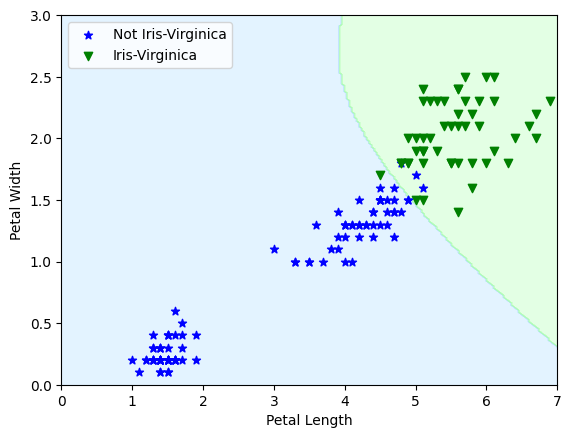

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * \
                      np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_false = X[y==0]
X_true = X[y==1]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_false[:,0], X_false[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_true[:,0], X_true[:,1], marker="v", c="green", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


As you may guess, the model does not have the same confidence in the prediction across all data points. The likelihood of one class is closer to the likelihood of the other class in points closer to the borders between classes than it is in points that are in the middle of the known data points. In the following code, we will project the certainty of the model according to the likelihood in a plot that will resemble a heatmap, where the intensity will be higher in points of highest likelihood.  

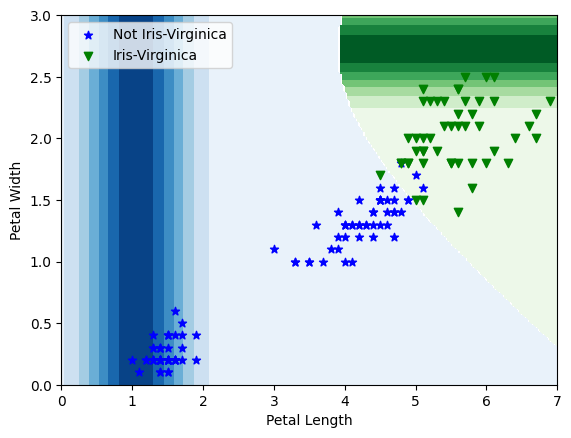

In [ ]:
import matplotlib.pyplot as plt

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * \
                      np.exp( - ((point - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_false = X[y==0]
X_true = X[y==1]

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, np.where(predictions == 0, max_posteriors, np.nan), cmap="Blues")
plt.contourf(xx, yy, np.where(predictions == 1, max_posteriors, np.nan), cmap="Greens")
plt.scatter(X_false[:,0], X_false[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_true[:,0], X_true[:,1], marker="v", c="green", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


As you can see, the further away the points are from the border, the stronger is the prediction in one class. In a large portion closer to the border, the differences are still significant enough to distinguish, but significantly lower than the further points. For this reason, the heatmap is not sensible enough to show the differences. Now let's visualize what happens with both plots when we consider more than two possible labels.

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris() 

X = iris["data"][:, 2:]
X_0 = iris["data"][:, 2] # Gets the petal length and width data
X_1 = iris["data"][:, 3] # Gets the petal length and width data

y = (iris["target"]).astype(int)

means, stds = np.zeros((X.shape[1], len(np.unique(y)))), np.zeros((X.shape[1], len(np.unique(y))))

for feature_num in range(X.shape[1]):
    for class_index in np.unique(y):
        tmp_x = X[:,feature_num][y==class_index]
        means[feature_num][class_index] = np.mean(tmp_x)
        stds[feature_num][class_index] = np.std(tmp_x)

print("Means:")
print(means)
print("Standard Deviations:")
print(stds)


Means:
[[1.462 4.26  5.552]
 [0.246 1.326 2.026]]
Standard Deviations:
[[0.17191859 0.46518813 0.54634787]
 [0.10432641 0.19576517 0.27188968]]


In [ ]:
prob_y = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    prob_y[y_value] = (len(X[y==y_value]) / len(X))
    print(f"Probability of Class {y_value}: {prob_y[y_value]:.2f}")


Probability of Class 0: 0.33
Probability of Class 1: 0.33
Probability of Class 2: 0.33


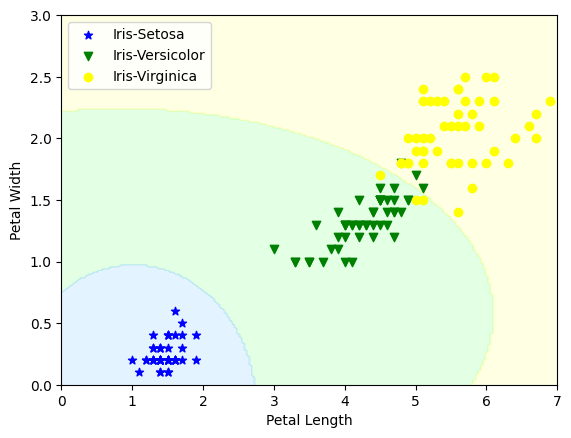

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * \
                        np.exp( - ((point.reshape(-1,1) - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


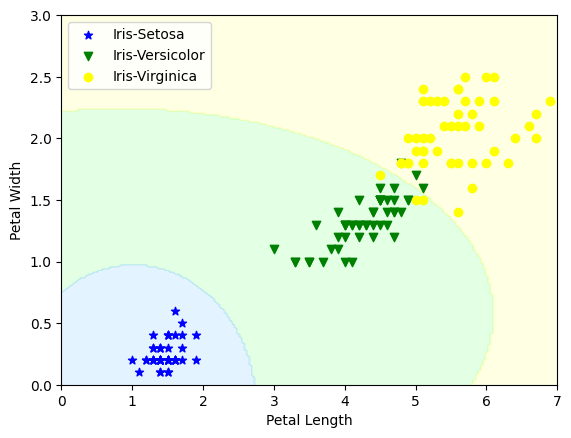

In [ ]:
import matplotlib.pyplot as plt

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * \
                      np.exp( - ((point.reshape(-1,1) - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.prod(likelihood_matrix, axis=0)
    posteriors = priors * likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = (len(X[y==y_value]) / len(X))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


The solution posed previously brings a computational problem, as it requires the multiplication of large quantities of numbers that are smaller than one, also contributing to numerical instability. The solution to this problem passes by analysing the log likelihood for each feature, instead of the regular likelihood like we used before. This method is implemented in ``scikit-learn`` as it is significantly faster and accurate than the regular form. The likelihood expression is then changed from this, where $d$ is the number of features available:

$$
P(y|x) \propto P(y) \times \Pi_{i}^{d} P(x_{i}|y)\\
$$

To this:

$$
P(y|x) \propto \text{log}(P(y)) + \sum_{i}^{d} \text{log}(P(x_{i}|y))\\
$$

Its implementation in code would then change to the following approach:

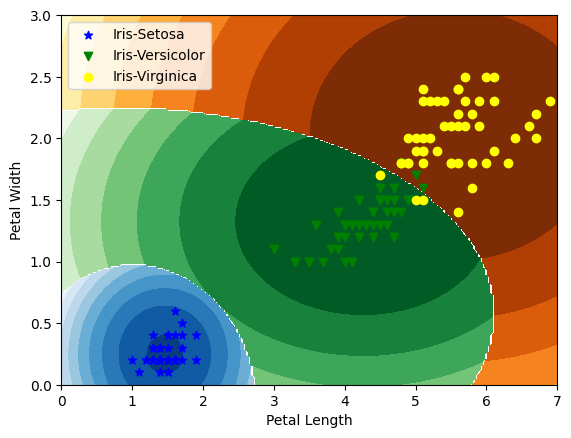

In [ ]:
import matplotlib.pyplot as plt

def predict_nb(point, priors):
    likelihood_matrix = 1 / np.sqrt(2 * np.pi * stds ** 2) * \
                        np.exp( - ((point.reshape(-1,1) - means) ** 2) / (2 * stds ** 2))
    likelihoods = np.sum(np.log(likelihood_matrix), axis=0)
    posteriors = priors + likelihoods
    return np.max(posteriors), np.where(posteriors == np.max(posteriors))[0][0]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

priors = np.zeros(len(np.unique(y)))
for y_value in np.unique(y):
    priors[y_value] = np.log((len(X[y==y_value]) / len(X)))

max_posteriors = np.zeros(data_points.shape[0])
predictions = np.zeros(data_points.shape[0])
for sample in range(data_points.shape[0]):
    max_posteriors[sample], predictions[sample] = predict_nb(data_points[sample, :], priors)

max_posteriors = max_posteriors.reshape(xx.shape)
predictions = predictions.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, np.where(predictions == 0, max_posteriors, np.nan), cmap="Blues")
plt.contourf(xx, yy, np.where(predictions == 1, max_posteriors, np.nan), cmap="Greens")
plt.contourf(xx, yy, np.where(predictions == 2, max_posteriors, np.nan), cmap="YlOrBr")
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


To implement the same model using ``scikit-learn``, we can use the following code:

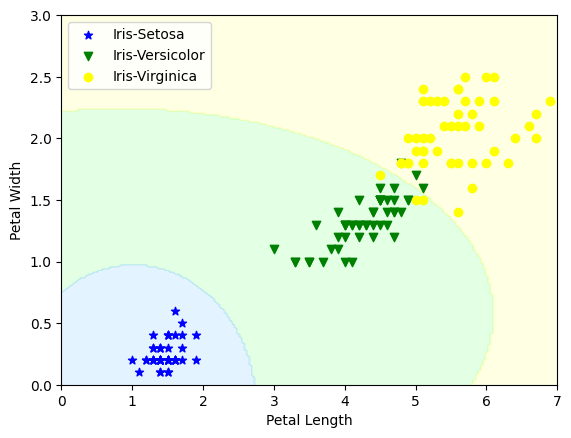

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

iris = load_iris()
X = iris["data"][:, 2:] # petal length, petal width
y = iris["target"]

clf = GaussianNB()
clf.fit(X, y)

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
data_points = np.c_[xx.ravel(), yy.ravel()]

predictions = clf.predict(data_points).reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(loc=2)
plt.show()


We have seen that for continous variables, the likelihood of a data point is assumed to follow a Normal Distribution, but this raises the issue of when the data we have access is not continuous. In the case of non-continuous data, discrete and binary data, it is assumed in the Naïve-Bayes another distribution: for discrete data the Multinomial Distribution is assumed, while for binary data it is a Bernoulli Distribution.

### Categorical Naïve-Bayes <a id="categorical-naive-bayes"></a>

To use the Iris dataset in a Categorical Naïve-Bayes approach, it is required to perform binning. Binning consists in the mapping of continuous values into different bins. For example, when the length is above 5, we call it large. Meanwhile, when the lenght is below 2, we call it small. Between these two values, we call it medium. A similar division can be performed regarding the petal width, where values below 0.7 are small, between 0.7 and 1.7 are medium, and above 1.7 are large. Please keep in mind this binning is purely arbitrarily and was made just to convert the continuous variables to discrete variables. In the code below, the loading and binning of the dataset is performed.  

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:, 2:]
X_0 = X[:, 0] # petal length
X_1 = X[:, 1] # petal width

X_0 = np.digitize(X_0, bins=[0, 2.0, 5.0])
X_1 = np.digitize(X_1, bins=[0, 0.7, 1.7])

X[:, 0] = X_0
X[:, 1] = X_1

y = iris["target"]


Now, let's plot the data to better visualize how it looks like after binning:

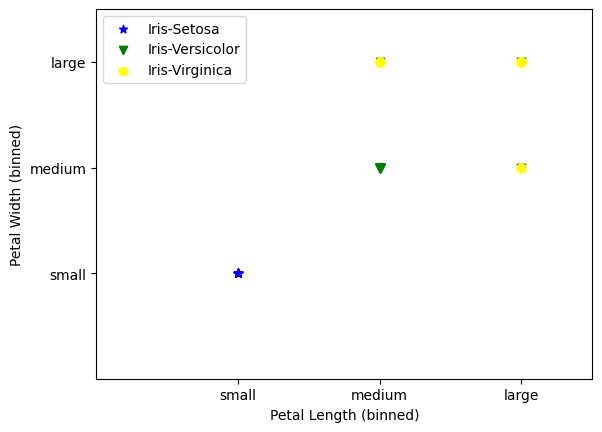

In [ ]:
import matplotlib.pyplot as plt

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

plt.axis([0, 3.5, 0, 3.5])

plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xticks([1, 2, 3], ["small", "medium", "large"])
plt.yticks([1, 2, 3], ["small", "medium", "large"])
plt.xlabel("Petal Length (binned)")
plt.ylabel("Petal Width (binned)")
plt.legend(loc=2)
plt.show()


It becomes evident in this plot that the multinomial approach is not the best solution for the present dataset, at least with the selected boundaries. Because of those boundaries, there exists some overlap between classes in some of the selected conditions. Nevertheless, to expose the reader to some more context, we shall progress with the implementation of this model.

The Gaussian Naïve-Bayes works based on the assumption that not only the features are independent between each other, but also that they follow a Gaussian (Normal distribution). In Categorical Naïve-Bayes, the same independence is assumed, but the distribution can no longer be Gaussian, as the variables are not continuous. In this case, the assumption is that the features follow a multinomial distribution, which is an extension of the binomial distribution. The multinomial distribution can be described as follows, starting by the Naïve assumption made previously, for $n$ features:

$$
\begin{aligned}
P(y|x) &= \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1},..., x_{n}) &\propto P(x_{1}|y) \times P(x_{2}|y) \times ... \times P(x_{n}|y) \times P(y)\\
\end{aligned}
$$

Since we only have two features, we can simplify to:

$$
\begin{aligned}
P(y|x) &= \frac{P(x|y) \times P(y)}{P(x)}\\
\Leftrightarrow P(y|x_{1}, x_{2}) &\propto P(x_{1}|y) \times P(x_{2}|y) \times P(y)\\
\end{aligned}
$$

From this, we calculate the probability of $y$ (prior probability) belonging to $c$ as follows, where $d$ is the number of features, $n$ is the number of data points, $1$ is the indicator function that returns 1 when $y_{i}=c$ is true, and 0 otherwise:

$$
P(y=c) = \frac{\sum_{i=1}^{d}1[y_{i}=c]}{n}
$$

To calculate the likelihood of features is where the multinomial distribution comes in, for a given point $x = (x_{1}=v, x_{2}=s)$ and considering $1$ as the indicator function which returns 1 when true and 0 when false:

$$
\begin{aligned}
& P(x|y=c) = \\
&= P(x_{1}=v|y=c) \times P(x_{2}=s|y=c) =\\ 
&= \frac{\sum_{i=1} (1[x_{1}^{(i)}=v] \times 1[y^{(i)}=c])}{\sum_{i=1}1[y^{(i)}=c]} \times \frac{\sum_{i=1}(1[x_{2}^{(i)}=s] \times 1[y^{(i)}=c])}{\sum_{i=1}1[y^{(i)}=c]}
\end{aligned}
$$

You might also want to include smoothing values to prevent division by zero. An example with Laplace smoothing, where $\alpha$ is an arbitrary value (usually 1) and $K_{j}$ is the number of possible values for feature $j$ can be written as shown:

$$
P(x|y=c) = \frac{\sum_{i=1} (1[x_{1}^{(i)}=v] \times 1[y^{(i)}=c]) + \alpha}{\sum_{i=1}1[y^{(i)}=c] + \alpha \cdot K_{j=1}} \times \frac{\sum_{i=1} (1[x_{2}^{(i)}=v] \times 1[y^{(i)}=c]) + \alpha}{\sum_{i=1}1[y^{(i)}=c] + \alpha \cdot K_{j=2}}
$$

Keep in mind this is applied in Categorical Naïve-Bayes and a different expression would be used in counted Multinomial Naïve-Bayes, for example in word counting, as it would also contain a term that considers the possible permutation counts. Nevertheless, this term can also be disregarded as it is common to all classes and useless when predicting the target class. However, similarly to what was seen in Gaussian Naïve-Bayes, the equation can also be rewritten in its log form to improve computational efficiency, such as follows:

$$
\begin{aligned}
&P(y|x_{1}, x_{2}) \propto \text{log}(P(x_{1}|y)) + \text{log}(P(x_{2}|y)) + \text{log}(P(y)) = \\
&= \text{log}\left(\frac{\sum_{i=1} (1[x_{1}^{(i)}=v] \times 1[y^{(i)}=c])}{\sum_{i=1}1[y^{(i)}=c]}\right) + \text{log}\left(\frac{\sum_{i=1}(1[x_{2}^{(i)}=s] \times 1[y^{(i)}=c])}{\sum_{i=1}1[y^{(i)}=c]}\right) + \text{log}(P(y))
\end{aligned}
$$

Now, we shall implement the regular approach in code:

In [ ]:
unique_classes = np.unique(y)
n_classes = len(unique_classes)
n_features = X.shape[1]
priors = np.zeros(n_classes)
alpha = 1e-6

K_values = [len(np.unique(X[:, j])) for j in range(n_features)]
max_K = max(K_values)

likelihoods = np.zeros((n_classes, n_features, max_K))
value_to_index = [{} for j in range(n_features)]

for j in range(n_features):
    unique_values_j = np.unique(X[:, j])
    for k, v in enumerate(unique_values_j):
        value_to_index[j][v] = k

for i, y_value in enumerate(unique_classes):
    priors[i] = np.sum(y == y_value) / len(y)
    n_class_samples = np.sum(y == y_value)

    for j in range(n_features):
        unique_values_j = np.array(list(value_to_index[j].keys()))
        K_j = len(unique_values_j)

        for k, v in enumerate(unique_values_j):
            count = np.sum((X[:, j] == v) & (y == y_value))
            likelihoods[i, j, k] = (count + alpha) / (n_class_samples + alpha * K_j)

print("Priors shape:", priors.shape)
print("Likelihoods shape:", likelihoods.shape)
print("Priors:", priors)


Priors shape: (3,)
Likelihoods shape: (3, 2, 3)
Priors: [0.33333333 0.33333333 0.33333333]


The likelihood is now a three-dimensional matrix. In the first dimension, we find the number of target classes, which is, in this case, three (Iris setosa, Iris virginica, and Iris versicolor). In the second dimension, the features, which are the petal height and width. In the third dimension, the possible classes each feature can have: small, medium, or large. For any combination of feature, $i$, and its corresponding class $v$, we can calculate the likelihood of it belonging to a target class, $c$ ($P(x_{i}=v|y=c)$). By multiplying these likelihoods by the priors corresponding to the target class, we can determine which target the data point is more likely to belong to. Therefore, we can calculate a 3 $\times$ 3 matrix that, for the class of each feature, contains the predicted target class. This can be performed as follows:

In [ ]:
predictions = np.zeros((K_values[0], K_values[1]))

for row in range(K_values[0]):
    for column in range(K_values[1]):
        target_probs = np.zeros(n_classes)
        for target_idx in range(n_classes):
            target_probs[target_idx] = likelihoods[target_idx, 0, row] * \
                                       likelihoods[target_idx, 1, column] * \
                                       priors[target_idx]
        predictions[row, column] = np.argmax(target_probs)

print("Predictions matrix:\n", predictions)


Predictions matrix:
 [[0. 0. 0.]
 [0. 1. 2.]
 [0. 2. 2.]]


For any given point, predict its classes through the prediction matrix obtained here. For that reason, we can conclude that the predicted classes for each model would be represented as shown in the following graphic:

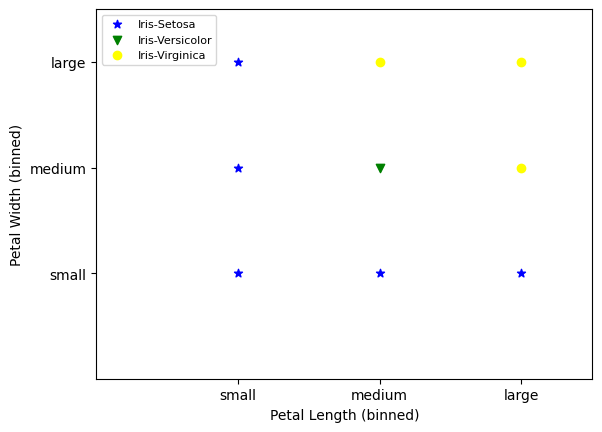

In [ ]:
X_scatter, y_scatter, class_vals = [], [], []

for row in range(predictions.shape[0]):
    for col in range(predictions.shape[1]):
        X_scatter.append(row + 1)
        y_scatter.append(col + 1)
        class_vals.append(predictions[row, col])

X_setosa = np.array(X_scatter)[np.array(class_vals)==0]
X_setosa = np.stack((X_setosa, np.array(y_scatter)[np.array(class_vals)==0]), axis=1)

X_versicolor = np.array(X_scatter)[np.array(class_vals)==1]
X_versicolor = np.stack((X_versicolor, np.array(y_scatter)[np.array(class_vals)==1]), axis=1)

X_virginica = np.array(X_scatter)[np.array(class_vals)==2]
X_virginica = np.stack((X_virginica, np.array(y_scatter)[np.array(class_vals)==2]), axis=1)

plt.axis([0, 3.5, 0, 3.5])

plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.xticks([1, 2, 3], ["small", "medium", "large"])
plt.yticks([1, 2, 3], ["small", "medium", "large"])
plt.xlabel("Petal Length (binned)")
plt.ylabel("Petal Width (binned)")
plt.legend(loc=2, prop={'size': 8})
plt.show()


From this, we can then estimate a map that indicates which class is predicted for any given attribute, as shown in the following plot, with the original data points overlapping:

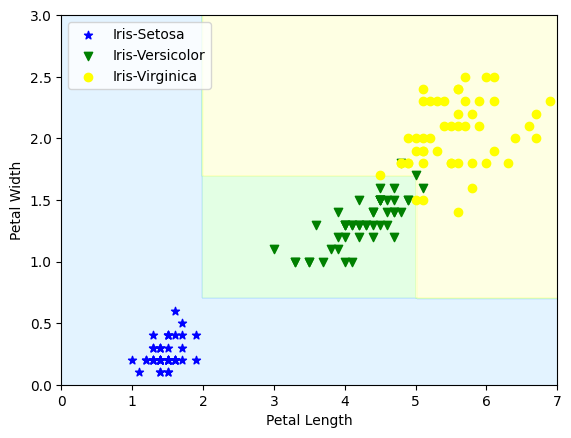

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = load_iris()
X = iris["data"][:, 2:]
y = iris["target"]

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

data_points[:,0] = np.digitize(data_points[:,0], bins=[0, 2.0, 5.0])
data_points[:,1] = np.digitize(data_points[:,1], bins=[0, 0.7, 1.7])
preds = np.zeros(data_points.shape[0])
for point_idx in range(len(data_points)):
    preds[point_idx] = predictions[int(data_points[point_idx, 0] - 1), int(data_points[point_idx, 1] - 1)]

preds = preds.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, preds, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


To perform the whole training and prediction using ``scikit-learn``, the following code can be used:

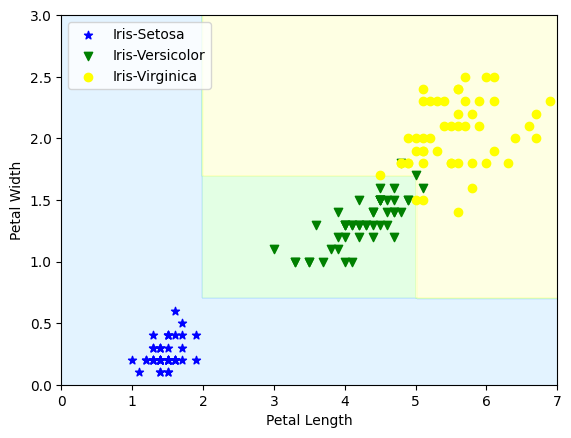

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.naive_bayes import CategoricalNB

iris = load_iris()
X = iris["data"][:, 2:] # petal length and petal width
y = iris["target"]

X_binned = np.zeros_like(X, dtype=int)
X_binned[:,0] = np.digitize(X[:,0], bins=[0, 2.0, 5.0])
X_binned[:,1] = np.digitize(X[:,1], bins=[0, 0.7, 1.7])

clf = CategoricalNB()
clf.fit(X_binned, y)

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]
data_points_binned = np.zeros_like(data_points, dtype=int)
data_points_binned[:,0] = np.digitize(data_points[:,0], bins=[0, 2.0, 5.0])
data_points_binned[:,1] = np.digitize(data_points[:,1], bins=[0, 0.7, 1.7])

preds = clf.predict(data_points_binned)
preds = preds.reshape(xx.shape)

X_setosa = X[y==0]
X_versicolor = X[y==1]
X_virginica = X[y==2]

cmap = ListedColormap(["#a5d8ff", "#a5ffa6", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, preds, alpha=0.3, cmap=cmap)
plt.scatter(X_setosa[:,0], X_setosa[:,1], marker="*", c="blue", label="Iris-Setosa")
plt.scatter(X_versicolor[:,0], X_versicolor[:,1], marker="v", c="green", label="Iris-Versicolor")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


### Bernoulli Naïve-Bayes <a id="bernoulli-naive-bayes"></a>

The last sub-category of Naïve-Bayes is Bernoulli Naïve-Bayes. In this case, we do not consider the features as continuous or multi-class, but binary instead. For example, in the first example of Naïve-Bayes, the petal width and length was considered as continuous measurement, while in Categorical Naïve-Bayes, the features were binned in different classes, depending on manually estabelished thresholds. Now, in Bernoulli, the values will be either true or false (1 or 0), when the value is below or above a determined threshold. Because the nature of the dataset considered, we can only apply Bernoulli Naïve-Bayes to a binary classification problem (such as Iris-setosa or not Iris-setosa) and obtain a reasonable classification model. If the relationship between the two features (petal width and length) was not linear (as one increases, so does the other), then it would be possible to perform accurate multi-class classification. Lastly, since we are dealing with binary features, a multi-class output with $K$ classes would be bounded by the number of features ($d$) as follows: $K \leq 2^{d}$.

In Bernoulli Naïve-Bayes, we assume that each feature follows a Bernoulli distribution, as the name suggests. Again, because it still is a Naïve-Bayes approach, we can describe that the probability of the data point $x$ belonging to the class $y$ is given by:

$$
P(y|x) = \frac{P(y)P(x|y)}{P(x)}
$$

However, as we have seen in the previous Naïve-Bayes approaches, when comparing $P(y=0|x)$ and $P(y=1|x)$, $P(x)$ can be disregarded as it is the same for both likelihoods, so that both can be compared by using only the following expression:

$$
P(y|x) \propto P(y)P(x|y)
$$

Again, the prior $P(y)$ is easily computable for any class $c$, with $n$ being the total number of data points and $1$ symbolizing the indicator function that is $1$ when $y_{i} = c$ and $0$ when $y_{i} \neq c$:

$$
P(y=c) = \frac{\sum_{i} 1 (y_{i}=c)}{n}
$$

Similar to what was seen in the previous Naïve-Bayes approaches, calculating the likelihoods $P(x|y)$ is usually the most complicated part. Again, we assume that features are conditionally independent for a given $y$, so that for two given features, $x_{1}$ and $x_{2}$, we get:

$$
P(x|y) = P(x_{1}|y) \times P(x_{2}|y)
$$

It is in order to calculate $P(x_{i}|y)$ that we assume the Bernoulli distribution. This distribution, calculated for a single feature $i$, can be put as:

$$
\begin{aligned}
&\hat{\theta}_{i|c} =\\
&= P(x_{i}|y) =\\
&= P(x_{i}=1|y)^{x_{i}}P(x_{i}=0|y)^{1-x_{i}} =\\
&= P(x_{i}=1|y)^{x_{i}}(1 - P(x_{i}=1|y))^{1-x_{i}}
\end{aligned}
$$

Where, $P(x_{i}=1|y=c)$ is calculated as follows, where $1$ is the indicator function that is $1$ when the condition is verified and $0$ otherwise:

$$
\hat{\theta}_{i=1|c} = P(x_{i}=1|y=c) = \frac{P(x_{i}=1 \cap y=c)}{P(y=c)} = \frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c))}{\sum_{j} 1 (y_{j}=c)}
$$

From this, we can now resume the likelihood of a class $c$, with $d$ features, as:

$$
\begin{aligned}
&P(y=c|x) \propto P(y=c) \times \Pi_{i=1}^{d} \left( \hat{\theta}_{i|c}^{x_{i}}(1 - \hat{\theta}_{i|c})^{1-x_{i}} \right) = \\ 
&= P(y=c) \times \Pi_{i=1}^{d} \left( P(x_{i}|y=c)^{x_{i}}(1 - P(x_{i}|y=c))^{1-x_{i}} \right) = \\
&= \frac{\sum_{i} 1 (y_{i}=c)}{n} \times \Pi_{i=1}^{d} \left( \left(\frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c))}{\sum_{j} 1 (y_{j}=c)}\right)^{x_{i}}\left(1 - \frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c))}{\sum_{j} 1 (y_{j}=c)}\right)^{1-x_{i}} \right)
\end{aligned}
$$

Similarly to what was seen in the categorical approach, the Laplace smoothing can also be added to prevent divisions by zero. In this case, while $\alpha$ is still an arbitrary value that is usually 1, the constant $K$ is always 2 since every feature is binary. The equation can then be represented as:

$$
\begin{aligned}
&P(y=c|x) \propto \frac{\sum_{i} 1 (y_{i}=c)}{n} \times \\
& \times \Pi_{i=1}^{d} \left( \left(\frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c)) + \alpha}{\sum_{j} 1 (y_{j}=c) + 2\alpha}\right)^{x_{i}}\left(1 - \frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c)) + \alpha}{\sum_{j} 1 (y_{j}=c) + 2\alpha}\right)^{1-x_{i}} \right)
\end{aligned}
$$

In its log form, without the Laplace smoothing, as seen in the previous examples, it can be written as:

$$
\begin{aligned}
&P(y=c|x) \propto \text{log}\left(\frac{\sum_{i} 1 (y_{i}=c)}{n}\right) \times \\ 
&\times \sum_{i=1}^{d} \left( \text{log} \left( \left(\frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c))}{\sum_{j} 1 (y_{j}=c)}\right)^{x_{i}}\left(1 - \frac{\sum_{j} (1 (x_{i,j}=1) \times 1 (y_{j}=c))}{\sum_{j} 1 (y_{j}=c)}\right)^{1-x_{i}} \right) \right)
\end{aligned}
$$

The $\hat{\theta}$ values can be previously calculated in training as follows, using the expression without logs:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
X = iris["data"][:,2:]
X[:,0] = (X[:,0] > 5).astype(int)
X[:,1] = (X[:,1] > 1.7).astype(int)
y = (iris["target"] == 2).astype(int)

priors = []
for target in np.unique(y):
    priors.append(len(y[y==target]) / len(y))

theta = np.zeros((X.shape[1], len(np.unique(y))))
for feature_idx in range(X.shape[1]):
    for target in np.unique(y):
        theta[feature_idx, target] = X[y==target,feature_idx].mean()

print("Theta: ", theta)


Theta:  [[0.01 0.82]
 [0.01 0.9 ]]


Parting from the calculated parameters, we can now predict every point, as done in the following snippet:

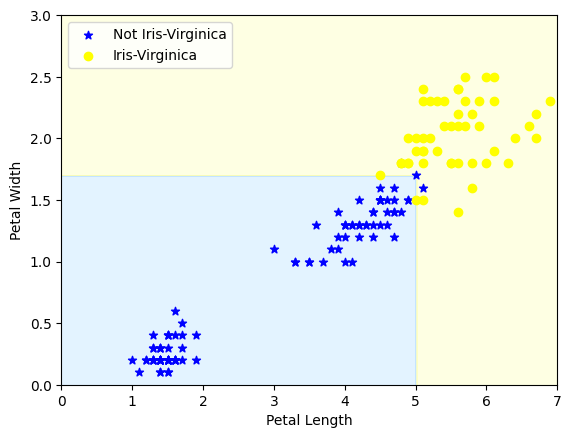

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris = load_iris()
X_original = iris["data"][:, 2:]
X[:,0] = (X_original[:,0] > 5).astype(int)
X[:,1] = (X_original[:,1] > 1.7).astype(int)
y_original = iris["target"]
y = (y_original == 2).astype(int)

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

data_points = np.c_[xx.ravel(), yy.ravel()]

data_points[:,0] = (data_points[:,0] > 5).astype(int)
data_points[:,1] = (data_points[:,1] > 1.7).astype(int)
preds = np.zeros(data_points.shape[0])

for point_idx in range(len(data_points)):
    resulting_likelihoods = np.zeros(len(np.unique(y)))
    likelihoods = [1] * len(np.unique(y))
    for i, likelihood in enumerate(likelihoods):
        for feature_idx in range(data_points.shape[1]):
            likelihood = likelihood * \
                         (theta[feature_idx, i] ** data_points[point_idx, feature_idx]) * \
                         (1 - theta[feature_idx, i]) ** (1 - data_points[point_idx, feature_idx])
        resulting_likelihoods[i] = likelihood
    probs = priors * resulting_likelihoods
    preds[point_idx] = np.argmax(probs)

preds = preds.reshape(xx.shape)

X = iris["data"][:, 2:]
y = iris["target"]

X_not_virginica = X_original[y<2]
X_virginica = X_original[y==2]


cmap = ListedColormap(["#a5d8ff", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, preds, alpha=0.3, cmap=cmap)
plt.scatter(X_not_virginica[:,0], X_not_virginica[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


To perform the whole training and prediction using ``scikit-learn``, the following code can be used:

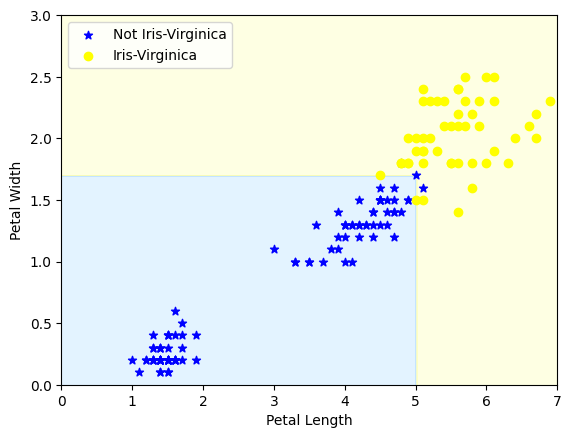

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.naive_bayes import BernoulliNB

iris = load_iris()
X_original = iris["data"][:, 2:] # petal length and petal width
y_original = iris["target"]

y = (y_original == 2).astype(int)

X = np.zeros_like(X_original, dtype=int)
X[:,0] = (X_original[:,0] > 5).astype(int)
X[:,1] = (X_original[:,1] > 1.7).astype(int)

clf = BernoulliNB()
clf.fit(X, y)

x_min, x_max = 0, 7
y_min, y_max = 0, 3
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
data_points = np.c_[xx.ravel(), yy.ravel()]

data_points_binarized = np.zeros_like(data_points, dtype=int)
data_points_binarized[:,0] = (data_points[:,0] > 5).astype(int)
data_points_binarized[:,1] = (data_points[:,1] > 1.7).astype(int)

preds = clf.predict(data_points_binarized)
preds = preds.reshape(xx.shape)

X_not_virginica = X_original[y==0]
X_virginica = X_original[y==1]

cmap = ListedColormap(["#a5d8ff", "#feffa5"])

plt.axis([0,7, 0,3])
plt.contourf(xx, yy, preds, alpha=0.3, cmap=cmap)
plt.scatter(X_not_virginica[:,0], X_not_virginica[:,1], marker="*", c="blue", label="Not Iris-Virginica")
plt.scatter(X_virginica[:,0], X_virginica[:,1], marker="o", c="yellow", label="Iris-Virginica")
plt.legend(loc=2)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


### Multinomial Naïve-Bayes <a id="multinomial-naive-bayes"></a>

For the Multinomial Naïve-Bayes, we will step away from the Iris dataset and resort to some examples using words, as its visualization is easier. Multinomial Naïve-Bayes is used mainly with discrete features that include (e.g. word counts for text classification). In this scenario, it models each word's count as a feature and assumes a multinomial distribution. In this approach, we assume that the frequency of the words (features) are independent from each other, hence Naïve, as was also seen in previous Naïve-Bayes examples. Let's start this example with a simple phrase in order to explain what is happening in this algorithm.

Imagine a vocabulary composed of just the following four words, {"buy", "free", "meeting", "schedule"}, a phrase that uses these words, "buy free free schedule". We can represent it as counts, resulting in "buy": 1, "free": 2, "meeting": 1, "schedule": 0. Representing it as a vector $x$, we get:

$$
x = (x_{\text{buy}}, x_{\text{free}}, x_{\text{meeting}}, x_{\text{schedule}}) = (1,2,0,1)
$$

For the classification of this message either in "spam" or "not spam", we are going to start with the same Naïve-Bayes formulation as the one seen in the Gaussian, Categorical, and Bernoulli examples:

$$
P(y|x) = \frac{P(y)P(x|y)}{P(x)}
$$

In a scenario where we need to classify a data point as either spam or not spam, $P(x)$ is the same independent of the class, which is why we can simplify the expression as follows, similarly to what was done in the previous Naïve-Bayes examples:

$$
P(y|x) \propto P(y)P(x|y)
$$

From this, we need to calculate both the prior and the likelihood independently. Starting with the priors, we are looking to estimate the share of data points classified in each class and it can be calculated as follows, where $c$ is any class and $1$ the indicator function:

$$
P(y=c) = \frac{\sum_{j} 1(y_{j} = c)}{\sum_{j} y_{j}}
$$

It is in the calculation of the likelihoods where the problem gets interesting. Because we are dealing with a Naïve-Bayes problem, we assume that each phrase is just a random drawing of words with no replacement from the vocabulary, in a way that the order of the words is irrelevant. For each class $c$, it is possible to estimate the likelihood ($\theta$) of each word in the vocabulary.

$$
\theta_{c} = \left(\theta_{c,1}, \theta_{c,2}, \theta_{c,3}, ..., \theta_{c,|V|}\right)
$$

With this, the likelihood of each class is then calculated as follows, in the Multinomial Naïve-Bayes:

$$
P(x|c) = \frac{N!}{x_{1}!x_{2}!...x_{|V|}!} \Pi_{j=1}^{|V|}\theta_{c, j}^{x_{j}}
$$

To better understand the calculation of the likelihood, let's split it in two terms, with the first being:

$$
\frac{N!}{x_{1}!x_{2}!...x_{|V|}!}
$$

This term is used for the computation of the total number of possibilities in which the word count vector could be obtained. In this equation, $N = \sum_{j} x_{j}$ corresponds to the total number of words in the phrase. The denominator, on the other hand, it counts the re-ordering of words that are the same: for example, in case two words "free" were extracted from the vocabulary, the order in which they appear is not relevant, as they are the same. This whole term is not necessary to estimate the class to which the phrase belongs to, as it is exactly the same independently of the class $c$, depending only on $x$. Similarly to what happened with $P(x)$, this component can be disregarded. It is the second term that is the most important for class estimation:

$$
\Pi_{j=1}^{|V|}\theta_{c, j}^{x_{j}}
$$

The likelihood of this class for a given $x$ is proportional to the product of all the likelihoods of each feature, since we are dealing with a Naïve problem:

$$
P(x|c) \propto \Pi_{j=1}^{|V|}\theta_{c, j}^{x_{j}} = \theta_{c, 1}^{x_{1}} \times \theta_{c, 2}^{x_{2}} \times ... \times \theta_{c, |V|}^{x_{|V|}}
$$

As each feature is assumed to follow a multinomial distribution, we can describe the likelihood of a feature as follows, where $i$ is the index of each phrase and $x_{i,j}$ corresponds to the total of words $x$ in that phrase:

$$
\theta_{c, j}^{x_{j}} = \frac{\sum_{i=1}^{M} \left( 1(y_{i}=c) x_{i,j} \right)}{\sum_{j} N_{c,j}}
$$

To prevent instances in which a word present in the vocabulary do not appear, in training, in any phrase, which would result in zero likelihood, we introduce Laplace smoothing:

$$
\theta_{c, j}^{x_{j}} = \frac{\sum_{i=1}^{M} \left( 1(y_{i}=c) x_{i,j} + \alpha \right)}{\sum_{j} N_{c,j} + \alpha |V|} \text{, where $\alpha$ is a constant, usually $1$}
$$

Similarly to the previous Naïve-Bayes approaches, the likelihoods can also be compared in its likelihood form to improve computational efficiency. In this context, the likelihoods are calculated as follows:

$$
P(x|c) \propto \sum_{j=1}^{|V|}\text{log}(\theta_{c, j}^{x_{j}}) = \text{log}\left(\theta_{c, 1}^{x_{1}}\right) + \text{log}\left(\theta_{c, 2}^{x_{2}}\right) + ... + \text{log}\left(\theta_{c, |V|}^{x_{|V|}}\right)
$$

Resulting in:

$$
P(y|c) \propto \text{log}\left(P(y)\right) + \sum_{j=1}^{|V|}\text{log}(\theta_{c, j}^{x_{j}})
$$

Let's now implement this in code with some examples:

In [ ]:
import numpy as np

docs = {
    1: "buy cheap now",
    2: "limited offer buy",
    3: "meet me now",
    4: "let's catch up",
}

labels = {
    1: "Spam",
    2: "Spam",
    3: "Not Spam",
    4: "Not Spam",
}

labels_list = []
for key in labels:
    labels_list.append(labels[key])

key_to_code = {}
for code, key in enumerate(np.unique(labels_list)):
    key_to_code[key] = code

labels_list_encoded = []
for label in labels_list:
    labels_list_encoded.append(key_to_code.get(label))

vocabulary = []
for key, doc in docs.items():
    words = doc.split(" ")
    for word in words:
        if word not in vocabulary:
            vocabulary.append(word)

priors = []
for target in np.unique(labels_list_encoded):
    count = 0
    for label in labels_list_encoded:
        if label == target:
            count += 1
    priors.append(count / len(labels_list_encoded))

counts_per_class = {}
for target in np.unique(labels_list_encoded):
    counts = []
    for word_counted in vocabulary:
        counter = 0
        for key, doc in docs.items():
            if key_to_code.get(labels.get(key)) == target:
                words = doc.split(" ")
                for word in words:
                    if word in vocabulary and word == word_counted:
                        counter += 1
        counts.append(counter)
    counts_per_class[target] = counts

theta = np.zeros((len(counts_per_class.get(0)), len(np.unique(labels_list_encoded))))
for feature in range(len(counts_per_class.get(0))):
    theta_feature = []
    for target in np.unique(labels_list_encoded):
        theta_target_feature = counts_per_class[target][feature] / sum(counts_per_class[target])
        theta[feature, target] = theta_target_feature

print("Theta (word x feature):\n", theta)


Theta (word x feature):
 [[0.         0.33333333]
 [0.         0.16666667]
 [0.16666667 0.16666667]
 [0.         0.16666667]
 [0.         0.16666667]
 [0.16666667 0.        ]
 [0.16666667 0.        ]
 [0.16666667 0.        ]
 [0.16666667 0.        ]
 [0.16666667 0.        ]]


To make a prediction of another phrase, such as "buy limited cheap" or "meet up now", we should proceed as follows:

In [ ]:
phrase_1 = "buy limited cheap"
phrase_2 = "meet up now"

docs = {1: phrase_1, 2: phrase_2}

counts_per_doc = {}

for key, doc in docs.items():
    counts = []
    words = doc.split(" ")
    for word_counted in vocabulary:
        counter = 0
        for word in words:
            if word in vocabulary and word == word_counted:
                counter += 1
        counts.append(counter)
    counts_per_doc[key] = counts

for doc_key, counts in counts_per_doc.items():
    probs = theta ** np.array(counts)[:, None]
    class_likelihoods = probs.prod(axis=0)
    print(f"Phrase {doc_key} is ", int(1 - np.argmax(class_likelihoods)) * "not ", "spam.", sep="")


Phrase 1 is spam.
Phrase 2 is not spam.


Now, implementing the same problem using just the ``scikit-learn`` library:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

docs = {
    1: "buy cheap now",
    2: "limited offer buy",
    3: "meet me now",
    4: "let's catch up",
}

labels = {
    1: "Spam",
    2: "Spam",
    3: "Not Spam",
    4: "Not Spam",
}

vectorizer = CountVectorizer()

docs_to_vectorize = []
for key, doc in docs.items():
    docs_to_vectorize.append(doc)
print(docs_to_vectorize)

X = vectorizer.fit_transform(docs_to_vectorize)
print(X)

labels_to_predict = []
for key, label in labels.items():
    labels_to_predict.append(label)

y = labels_to_predict
print(y)

clf = MultinomialNB()
clf.fit(X, y)

new_doc_1 = "buy limited cheap"
new_doc_2 = "meet up now"

X_new_1 = vectorizer.transform([new_doc_1])
print("Phrase 1 is", clf.predict(X_new_1)[0])

X_new_2 = vectorizer.transform([new_doc_2])
clf.predict(X_new_2)
print("Phrase 2 is", clf.predict(X_new_2)[0])


['buy cheap now', 'limited offer buy', 'meet me now', "let's catch up"]
  (0, 0)	1
  (0, 2)	1
  (0, 7)	1
  (1, 0)	1
  (1, 4)	1
  (1, 8)	1
  (2, 7)	1
  (2, 6)	1
  (2, 5)	1
  (3, 3)	1
  (3, 1)	1
  (3, 9)	1
['Spam', 'Spam', 'Not Spam', 'Not Spam']
Phrase 1 is Spam
Phrase 2 is Not Spam


The implementation using ``scikit-learn`` is much simpler, mainly to heavy weight done by the ``CountVectorizer`` function. This function creates a vocabulary from the words present across the documents and sorts them alphabetically (second term of the set shown above). Each word count in each document (which is identified by the first term in the set) is presented on the right side of each line. Then, the same calculations explained above are performed in the function fit. It's inference then results in the same labels as our hand-made example.

#### Complement Naïve-Bayes <a id="complement-naive-bayes"></a>

Complement Naïve-Bayes is a variant of Naïve-Bayes that is used mainly in scenarios of class imbalancement. Class imbalanced datasets are datasets where one of the classes is much more frequent than the other. This is common practice in examples such as spam detection, where most messages are from non-spam sources and only a limited sample is actually spam, or medical data, where the vast majority of patients do not suffer from the considered condition.

## Decision Tree <a id="decision-tree"></a>

## Random Forest <a id="random-forest"></a>

## Support Vector Machine (SVM) <a id="support-vector-machine"></a>

## K-Nearest Neighbours (KNN) <a id="k-nearest-neighbours"></a>

K-Nearest Neighbours (KNN), similarly to Decision Trees and Random Forests, is one of the algorithms that is remarkable for its simplicity, but becomes increasingly more complicated as we dive deeper into it. However, we shall start slow and leave the more complex matters for later.

Consider a given point, with two features $(x_{1}, x_{2})$, that you want to classify. In KNN, we check the class of the K nearest points and use them as votes for the point we want to classify. The class that is the most voted across the K selected neighbours, is the class attributed to the given point. This is the basic idea of a KNN Classifier, from which you may raise many questions that hopefully will be answered below.

The first question we can raise is: how do we calculate the distance between our given point and any other point from which we know the class? By default, the distance metric considered is the Euclidean Distance, but other plausible contestants are considered. Below, you can find more on the distances between points.

### Distance Between Two Points <a id="distance-between-two-points"></a>

Before we start introducing the distances between some points, keep in mind that, to make the content more digestible, we are just going to demonstrate how to calculate the distance between points that are defined by two coordinates (e.g. the point A is defined by $(x_{A}, y_{A})$).

#### Minkowski Distance <a id="minkowski-distance"></a>

The Minkowski Distance is the first distance presented because it encompasses two very important distances within itself, depending on the selected positive $p$ parameter. For two given points, $A (x_{A}, y_{A})$ and $B (x_{B}, y_{B})$, the Minkowski distance ($d_{M}$) is calculated as follows:

$$ d_{M} (A,B) = \sqrt[p]{\left(|x_{A} - x_{B}|\right)^{p} + \left(|x_{A} - x_{B}|\right)^{p}} $$

Just for further reference, this distance can be calculated for points that are defined by more than just two coordinates. With $F$ being the aggregate of all the coordinates/features that define points $A$ and $B$, this distance can be generalized to:

$$ d_{M} (A,B) = \sqrt[p]{\sum_{f \in F} \left(|f_{A} - f_{B}|\right)^{p}} $$

The fun part of the Minkowski Distance is the $p$ value. When we change this value to $p=1$, we get the Manhattan Distance, but when it is $p=2$, we get the Euclidean Distance.

#### Manhattan, City Block, or L1 Distance <a id="manhattan-distance"></a>
The Manhattan Distance between two points $A$ and $B$, which can also be called City Block or L1 Distance, is therefore defined in the following equation:

$$ d_{L1} = |x_{A} - x_{B}| + |y_{A} - y_{B}| $$

#### Euclidean or L2 Distance <a id="euclidean-distance"></a>
The Euclidean Distance is the most common distance used in KNN and other ML algorithms, being often referred to just as "distance". The Euclidean Distance between two points $A$ and $B$ is given by:

$$ d_{L2} = \sqrt{(x_{A} - x_{B})^{2} + (y_{A} - y_{B})^{2}} $$

##### NaN-Euclidean Distance <a id="nan-euclidean-distance"></a>
In ML, often times we deal with parameters that have missing values, where inputation may not always be an option, since the lack of knowledge in a feature can also, itself, be representative of a pattern. To workaround features with missing values, there is an adaptation of the Euclidean Distance in which the distance between two data points is only calculated between the coordinates with non-null values. This adaptation is called NaN-Euclidean-Distance and is defined as:

$$ d_{\text{NaN-L2}} (A,B) = \sqrt{\sum_{f \in F \bigcap f_{A} \notin \varnothing \bigcap f_{A} \notin \varnothing} \left(f_{A} - f_{B}\right)^{2}} $$

#### Haversine Distance <a id="haversine-distance"></a>
